# MCDA Staffing Pattern Changes (20212024)

This notebook reviews Michigan Center for Data and Analytics (MCDA) staffing patterns aggregated to the ten supply-chain segments. It highlights employment shifts for major and detailed occupations between 2021 and 2024 and compares educational requirements using employment projections metadata (Table 1.2).


In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context='talk', style='whitegrid')
project_root = Path.cwd()
if not (project_root / 'data').exists():
    project_root = project_root.parent
DATA_PROCESSED = project_root / 'data' / 'processed'
DATA_INTERIM = project_root / 'data' / 'interim'
FIG_DIR = project_root / 'reports' / 'figures'
FIG_DIR.mkdir(parents=True, exist_ok=True)


In [2]:
major = pd.read_csv(DATA_PROCESSED / 'mcda_staffing_major_2021_2024.csv')
detailed = pd.read_csv(DATA_PROCESSED / 'mcda_staffing_detailed_2021_2024.csv')
edu_summary = pd.read_csv(DATA_PROCESSED / 'mcda_staffing_education_summary.csv')

major.head()


,segment,occcd,soctitle,empl_2021,empl_2024,occ_level,is_total_all,pct_seg_major_2021,pct_seg_detailed_2021,pct_seg_major_2024,...,ep_employment_2024,ep_employment_2034,ep_change_numeric,ep_change_percent,ep_openings_annual_avg,ep_median_annual_wage_2024,ep_entry_education,ep_work_experience,ep_on_the_job_training,ep_edu_grouped
0,1. Materials & Processing,00-0000,Total all occupations,72030.0,121620.0,major,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1. Materials & Processing,11-0000,Management Occupations,4640.0,5880.0,major,False,0.064444,NaN,0.048355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1. Materials & Processing,13-0000,Business and Financial Operations Occupations,3300.0,3710.0,major,False,0.045833,NaN,0.030510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1. Materials & Processing,15-0000,Computer and Mathematical Occupations,690.0,800.0,major,False,0.009583,NaN,0.006579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1. Materials & Processing,17-0000,Architecture and Engineering Occupations,3750.0,5790.0,major,False,0.052083,NaN,0.047615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Aggregated Change by Major Occupation

The table below ranks major occupation families by total employment change across all segments. Values reflect the sum of segment-level changes.


In [3]:
major_totals = (major
                 .groupby(['occcd', 'soctitle'], as_index=False)
                 .agg({
                     'empl_2021': 'sum',
                     'empl_2024': 'sum',
                     'level_change_2021_2024': 'sum'
                 })
                )
major_totals['pct_change_2021_2024'] = ((major_totals['empl_2024'] / major_totals['empl_2021']) - 1) * 100
major_top = major_totals.sort_values('level_change_2021_2024', ascending=False).head(10)
major_bottom = major_totals.sort_values('level_change_2021_2024').head(10)
major_top[['occcd', 'soctitle', 'level_change_2021_2024']]


,occcd,soctitle,level_change_2021_2024
0,00-0000,Total all occupations,113390.0
20,51-0000,Production Occupations,46550.0
1,11-0000,Management Occupations,6290.0
19,49-0000,"Installation, Maintenance, and Repair Occupations",5670.0
2,13-0000,Business and Financial Operations Occupations,5480.0
4,17-0000,Architecture and Engineering Occupations,4970.0
3,15-0000,Computer and Mathematical Occupations,4900.0
18,47-0000,Construction and Extraction Occupations,3300.0
21,53-0000,Transportation and Material Moving Occupations,3160.0
16,41-0000,Sales and Related Occupations,2190.0


C:\Users\vasilauskas\AppData\Local\Temp\ipykernel_20624\3693060998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=major_top, x='level_change_2021_2024', y='soctitle', ax=ax, palette='crest')


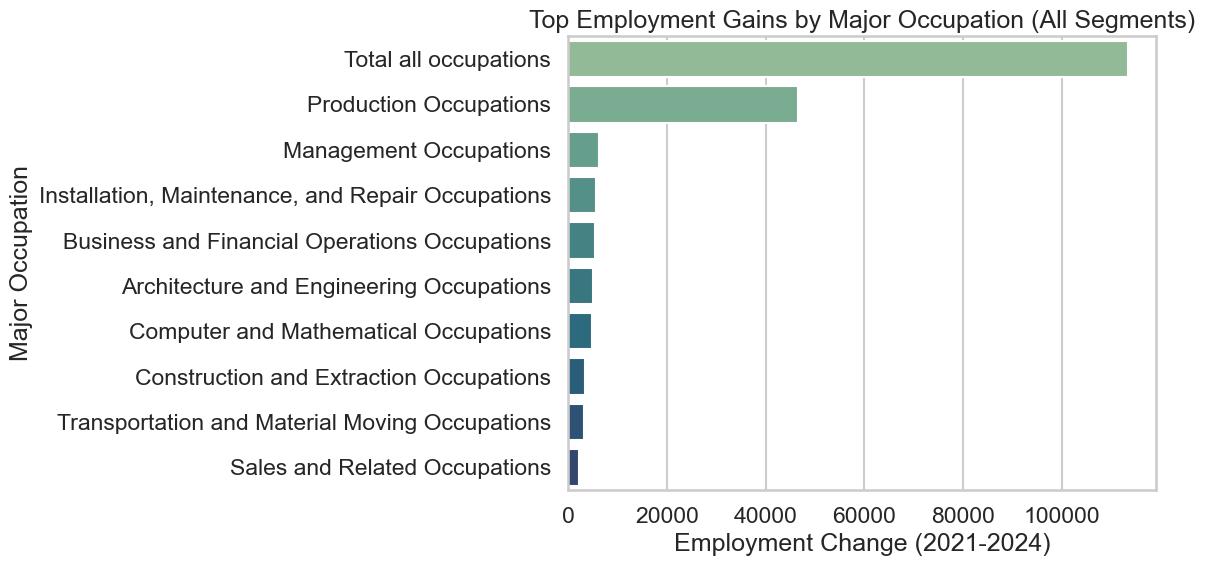

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=major_top, x='level_change_2021_2024', y='soctitle', ax=ax, palette='crest')
ax.set_xlabel('Employment Change (2021-2024)')
ax.set_ylabel('Major Occupation')
ax.set_title('Top Employment Gains by Major Occupation (All Segments)')
fig.tight_layout()
fig.savefig(FIG_DIR / 'mcda_major_top_changes.png', dpi=300, bbox_inches='tight')
plt.show()


### Largest Declines

The next table lists major occupations with the largest declines in employment.


In [5]:
major_bottom[['occcd', 'soctitle', 'level_change_2021_2024']]


,occcd,soctitle,level_change_2021_2024
17,43-0000,Office and Administrative Support Occupations,-1180.0
9,27-0000,"Arts, Design, Entertainment, Sports, and Media...",-910.0
13,35-0000,Food Preparation and Serving Related Occupations,-220.0
14,37-0000,Building and Grounds Cleaning and Maintenance ...,-40.0
15,39-0000,Personal Care and Service Occupations,0.0
11,31-0000,Healthcare Support Occupations,0.0
6,21-0000,Community and Social Service Occupations,20.0
8,25-0000,Educational Instruction and Library Occupations,90.0
7,23-0000,Legal Occupations,100.0
12,33-0000,Protective Service Occupations,160.0


C:\Users\vasilauskas\AppData\Local\Temp\ipykernel_20624\3325188105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=major_bottom.sort_values('level_change_2021_2024'), x='level_change_2021_2024', y='soctitle', ax=ax, palette='flare')


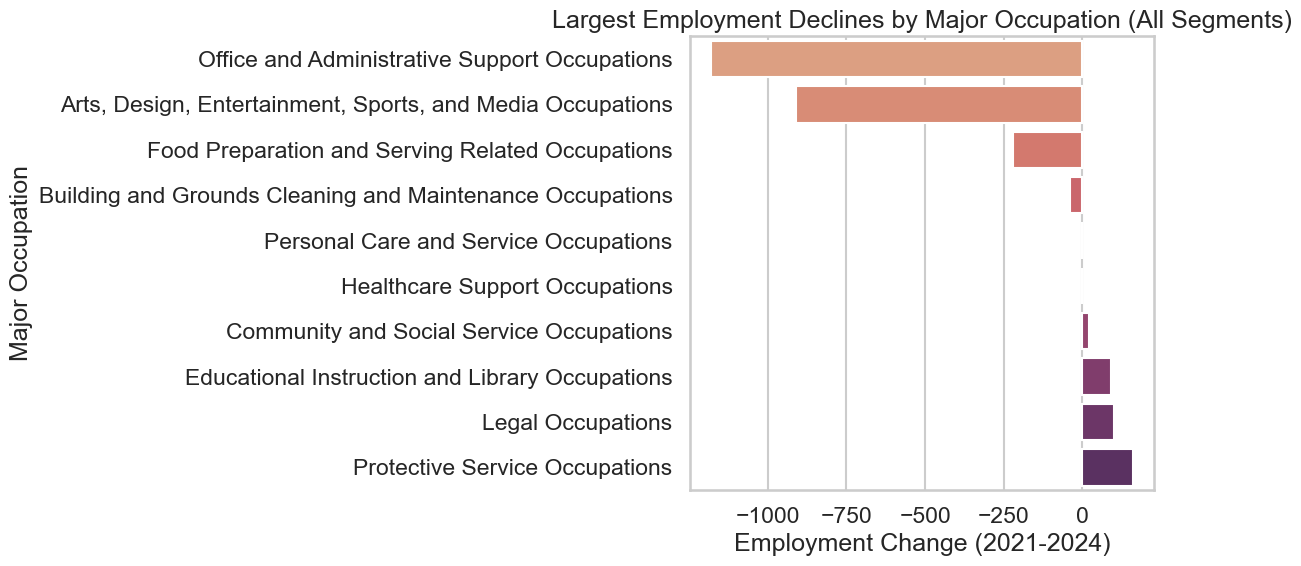

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=major_bottom.sort_values('level_change_2021_2024'), x='level_change_2021_2024', y='soctitle', ax=ax, palette='flare')
ax.set_xlabel('Employment Change (2021-2024)')
ax.set_ylabel('Major Occupation')
ax.set_title('Largest Employment Declines by Major Occupation (All Segments)')
fig.tight_layout()
fig.savefig(FIG_DIR / 'mcda_major_bottom_changes.png', dpi=300, bbox_inches='tight')
plt.show()


## Detailed Occupations: Top Movers

Detailed occupations drive much of the segment-level dynamics. The following chart shows the top 15 detailed occupations by employment growth across all segments.


C:\Users\vasilauskas\AppData\Local\Temp\ipykernel_20624\805397159.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top15_detailed, x='level_change_2021_2024', y='soctitle', ax=ax, palette='viridis')


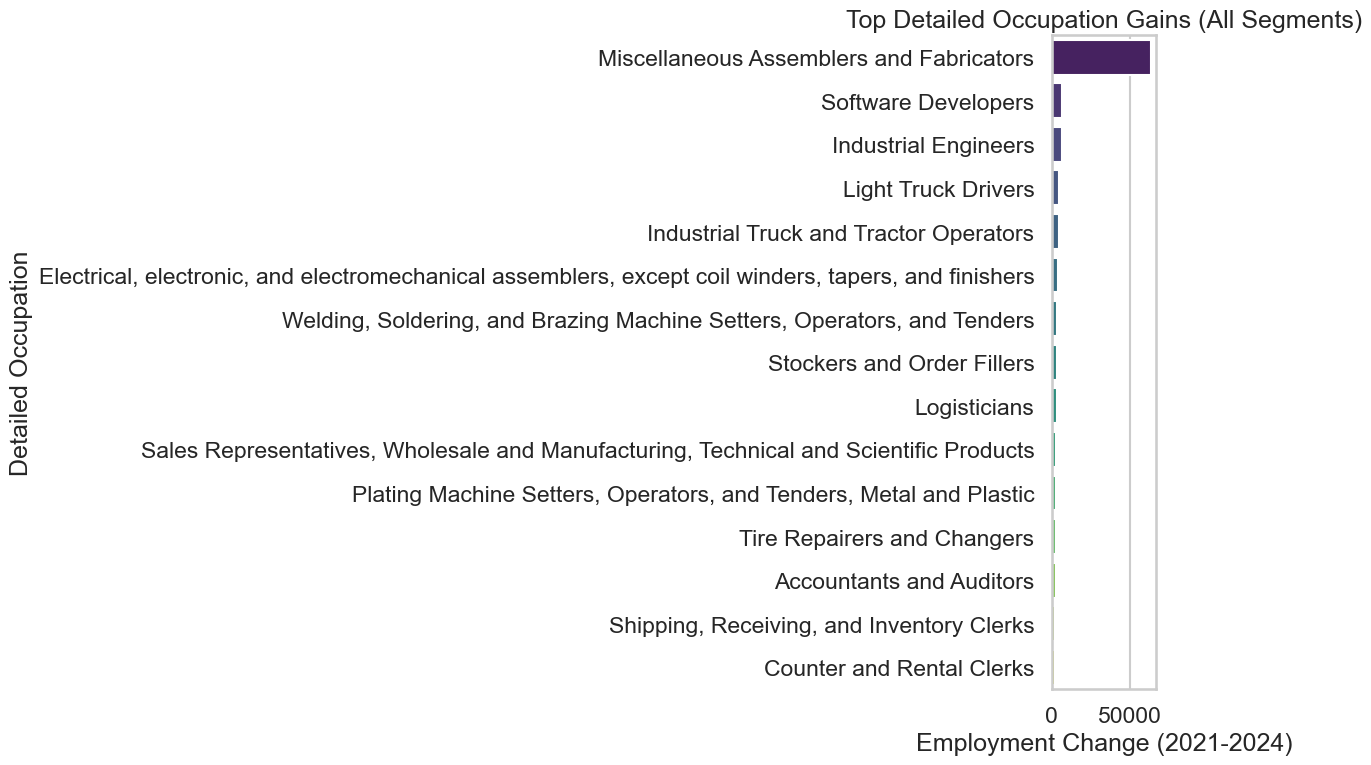

In [7]:
detailed_totals = (detailed
                    .groupby(['occcd', 'soctitle'], as_index=False)
                    .agg({
                        'empl_2021': 'sum',
                        'empl_2024': 'sum',
                        'level_change_2021_2024': 'sum'
                    })
                   )
detailed_totals['pct_change_2021_2024'] = ((detailed_totals['empl_2024'] / detailed_totals['empl_2021']) - 1) * 100
top15_detailed = detailed_totals.sort_values('level_change_2021_2024', ascending=False).head(15)
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=top15_detailed, x='level_change_2021_2024', y='soctitle', ax=ax, palette='viridis')
ax.set_xlabel('Employment Change (2021-2024)')
ax.set_ylabel('Detailed Occupation')
ax.set_title('Top Detailed Occupation Gains (All Segments)')
fig.tight_layout()
fig.savefig(FIG_DIR / 'mcda_detailed_top_changes.png', dpi=300, bbox_inches='tight')
plt.show()


## Education Composition (Detailed Occupations)

Using the Table 1.2 projections metadata, detailed occupations are mapped to three education groups. The chart below compares the 2021 vs. 2024 mix for each segment.


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vasilauskas\AppData\Local\Temp\ipykernel_20624\2625091138.py:4: SyntaxWarning: invalid escape sequence '\d'
  edu_long['year'] = edu_long['year'].str.extract('(\d{4})').astype('Int64')


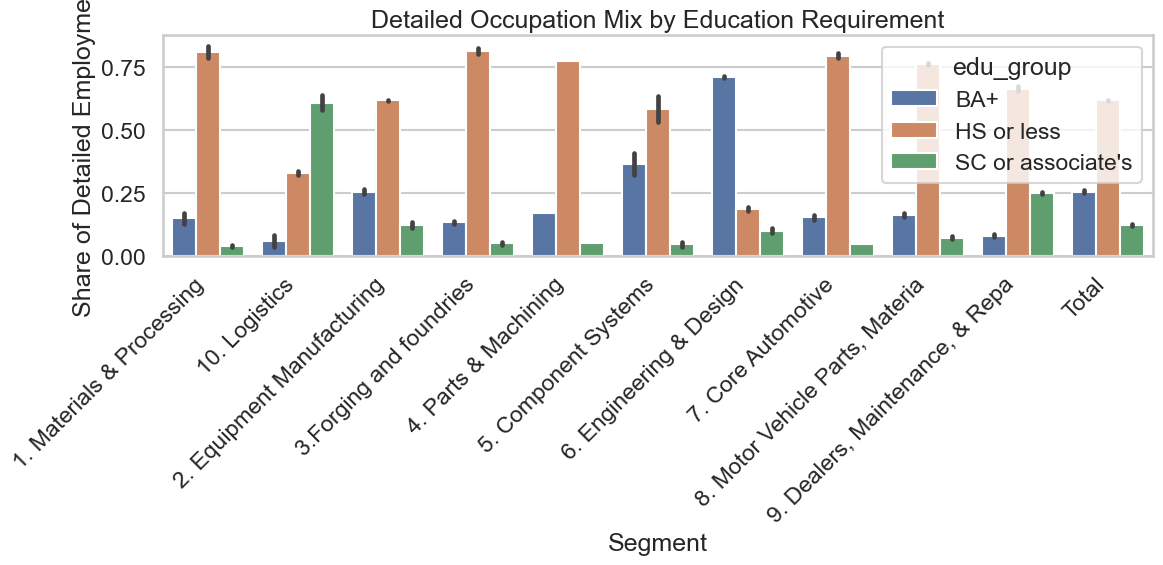

In [8]:
edu_segments = edu_summary[edu_summary['segment'] != 'All Segments Combined'].copy()
edu_long = edu_segments.melt(id_vars=['segment', 'edu_group'], value_vars=['share_2021', 'share_2024'],
                            var_name='year', value_name='share')
edu_long['year'] = edu_long['year'].str.extract('(\d{4})').astype('Int64')
edu_long = edu_long.dropna(subset=['year'])
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=edu_long, x='segment', y='share', hue='edu_group', ax=ax)
ax.set_ylabel('Share of Detailed Employment')
ax.set_xlabel('Segment')
ax.set_title('Detailed Occupation Mix by Education Requirement')
ax.tick_params(axis='x', rotation=45)
for label in ax.get_xticklabels():
    label.set_horizontalalignment('right')
fig.tight_layout()
fig.savefig(FIG_DIR / 'mcda_detailed_education_mix.png', dpi=300, bbox_inches='tight')
plt.show()


## Notes

- Processed inputs generated by scripts/process_mcda_staffing.py.
- Figures are exported to 
eports/figures/ for use in presentations or dashboards.
- Update raw staffing data or employment projections and rerun the processing script before refreshing this notebook.
